In [1]:
#Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn; seaborn.set()
import statistics

#Loading dataset and checking for any possible NaN values
recruitmentData = pd.read_csv (r'recruitmentdataset-2022-1.3.csv')
if not recruitmentData.isnull().values.any(): print('The data set has no missing inputs') 

#List of features
print(recruitmentData.columns)

The data set has no missing inputs
Index(['Id', 'gender', 'age', 'nationality', 'sport', 'ind-university_grade',
       'ind-debateclub', 'ind-programming_exp', 'ind-international_exp',
       'ind-entrepeneur_exp', 'ind-languages', 'ind-exact_study', 'ind-degree',
       'company', 'decision'],
      dtype='object')


Text(0, 0.5, 'Distributions')

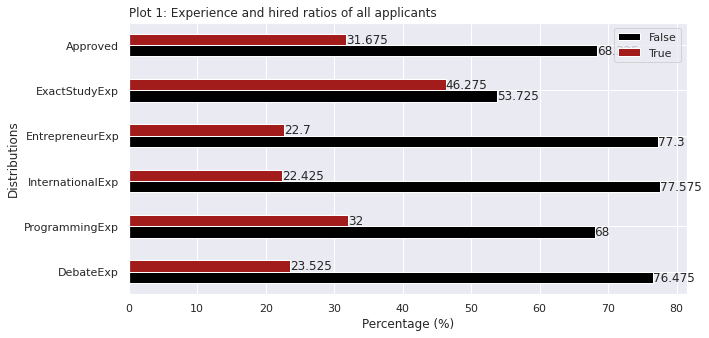

In [2]:
#Create data frame for the dichotomous features
dichotomousFrame = pd.DataFrame(recruitmentData, columns=['ind-debateclub', 'ind-programming_exp', 'ind-international_exp',
                                                          'ind-entrepeneur_exp', 'ind-exact_study',  'decision'])

dichotomousFrame = dichotomousFrame.rename(columns={'ind-debateclub': 'DebateExp', 'ind-programming_exp': 'ProgrammingExp', 'ind-exact_study': 'ExactStudyExp',
                                                    'ind-international_exp': 'InternationalExp', 'ind-entrepeneur_exp': 'EntrepreneurExp', 'decision': 'Approved'})

#Dichotomous features plotting in percentages
dichotomousFrame = dichotomousFrame.apply(pd.value_counts).div(len(dichotomousFrame)).mul(100)
dichotomousFrameFlip = dichotomousFrame.transpose()
axis = dichotomousFrameFlip.plot.barh(figsize=(10,5), color={'#000000','#a31c1c'})
for container in axis.containers: axis.bar_label(container)

plt.title('Plot 1: Experience and hired ratios of all applicants',loc='left')
plt.xlabel('Percentage (%)')
plt.ylabel('Distributions')

Text(0.5, 0.98, 'Plot 2: Multichotomous qualitiy distributions of all applicants')

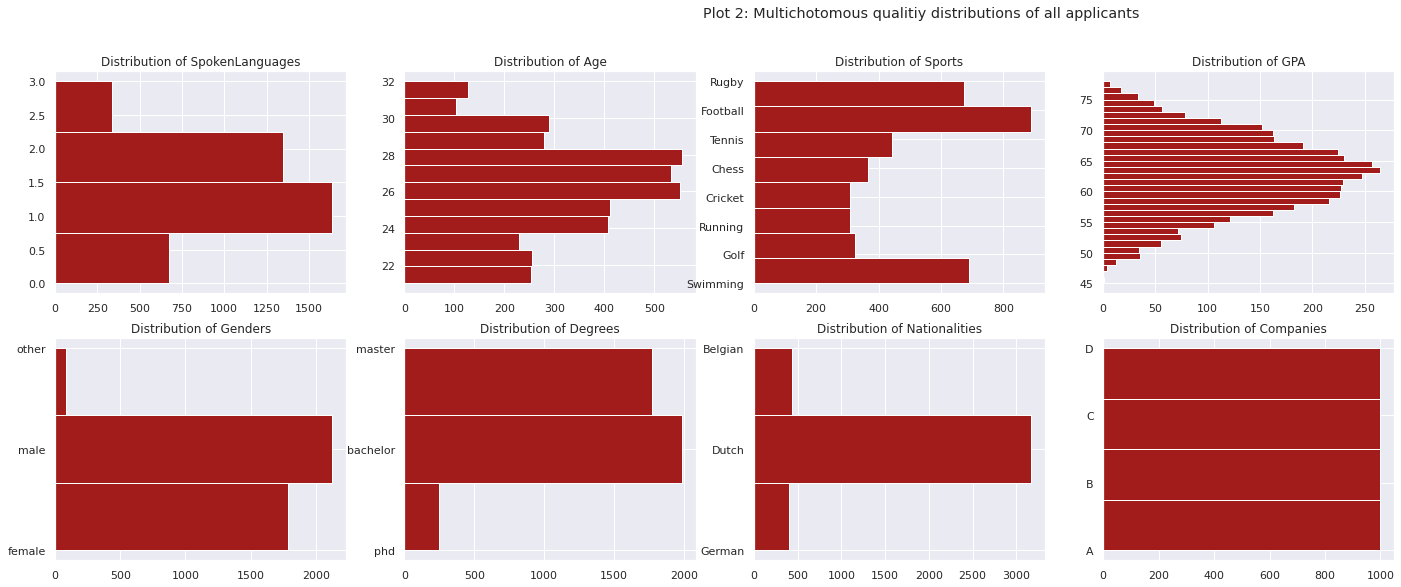

In [24]:
#Create data frame for the multichotomous features
multichotomousFrame = pd.DataFrame(recruitmentData, columns=['ind-languages', 'age', 'sport', 'ind-university_grade',
                                                             'gender', 'ind-degree', 'nationality',  'company'])
multichotomousFrame.columns = ['SpokenLanguages', 'Age', 'Sports', 'GPA', 'Genders', 'Degrees', 'Nationalities', 'Companies']

#Multichotomous features plotting
fig, axs = plt.subplots(2,4)
fig.set_figwidth(24)
fig.set_figheight(9)

for x in range(2):
    for y in range(4):
        column = multichotomousFrame.iloc[:, (x * 4 + y)]
        axs[x, y].set_title('Distribution of ' + column.name)
        axs[x, y].hist(column, bins = column.unique().size, align='mid', orientation='horizontal', color='#a31c1c')
fig.suptitle('Plot 2: Multichotomous qualitiy distributions of all applicants', horizontalalignment='left')